## OpenCV Module (GUI)

In [ ]:
import os, shutil
import math
import random
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import time

In [2]:
faceCascadepath = './haarcascade_frontalface_default.xml'
# eyeCascadepath = './haarcascade_eye.xml'
modelpath = './model.h5'

In [3]:
mmh1 = load_model(modelpath)
faceCascade = cv2.CascadeClassifier(faceCascadepath)
# eye_cascade = cv2.CascadeClassifier(eyeCascadepath)

In [4]:
def random_():
    return random.random()*100

In [5]:
def calculate(image):
    faces = faceCascade.detectMultiScale(image)
    roi_color = []
    for (x, y, w, h) in faces:
        roi_color = image[y:y + h, x:x + w]
        try:
            my_img = cv2.resize(roi_color, (64, 64))
            x_train = np.asarray(my_img)
            x_train = x_train.reshape((1,64,64,3))
            prediction = 100*(mmh1.predict(x_train))
            if np.argmax(prediction[0]) == 0: #confident
                return prediction[0][0], 0
            return prediction[0][0], 1 #unconfident
        except:
            return random_(), 1
    return random_(), 1

In [6]:
vidcap = cv2.VideoCapture(0)
predictions = []
times = []
t1 = time.time()
count = 0
val = 0
color = (255,0,0)
while True:
    hasframes, image = vidcap.read()
    if hasframes :
        if count % 60 == 0 :
            pred, check = calculate(image)
            predictions.append(pred)
            times.append(time.time()/10000)
            val = pred
        count += 1
        image = cv2.putText(image,
                            str(val)+"%",
                            (50,50),
                            cv2.FONT_HERSHEY_SIMPLEX, 
                            1,
                            color,
                            2, 
                            cv2.LINE_AA)
        cv2.imshow('image', image)
            
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
t2 = time.time()
print((t2-t1)/100, count)
vidcap.release()
cv2.destroyAllWindows()

1.0428652739524842 2896


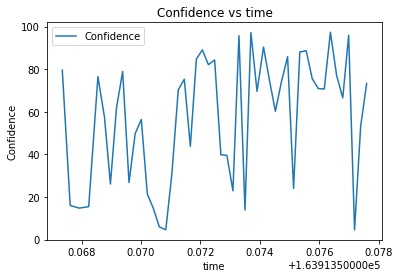

In [7]:
import matplotlib.pyplot as plt
plt.plot(times, predictions)
plt.legend(['Confidence'])
plt.title("Confidence vs time")
plt.xlabel("time")
plt.ylabel("Confidence")
plt.show()

In [8]:
print("Average Confidence during the interview was ", np.mean(predictions))

Average Confidence during the interview was  57.47910448876916
